In [1]:
from matplotlib import pyplot as plt
from sklearn import linear_model
from sklearn.metrics import mean_squared_error, r2_score
from scipy.optimize import curve_fit
from scipy import stats
import numpy as np
from decimal import Decimal
from matplotlib.ticker import MaxNLocator
from matplotlib import rc
import pandas as pd
from sklearn.preprocessing import normalize
import glob

# Kmin = 1

## Criticality analysis

### Read the simulation of biggest component size (series per fraction of edges added)

In [3]:
folder = "/home/marcio/pCloudDrive/Physics/Thesis/Andre/Results/Mean/"
data = []
for i in range(5):
    filenames = sorted(glob.glob(folder + 'Biggest_component_*_'+str(i)+'_1.txt'))
    print(filenames)
    data.append([np.loadtxt(fname=f, delimiter=',') for f in filenames])

['/home/marcio/pCloudDrive/Physics/Thesis/Andre/Results/Mean/Biggest_component_1E5_0_1.txt', '/home/marcio/pCloudDrive/Physics/Thesis/Andre/Results/Mean/Biggest_component_1E6_0_1.txt', '/home/marcio/pCloudDrive/Physics/Thesis/Andre/Results/Mean/Biggest_component_1E7_0_1.txt', '/home/marcio/pCloudDrive/Physics/Thesis/Andre/Results/Mean/Biggest_component_5E5_0_1.txt', '/home/marcio/pCloudDrive/Physics/Thesis/Andre/Results/Mean/Biggest_component_5E6_0_1.txt', '/home/marcio/pCloudDrive/Physics/Thesis/Andre/Results/Mean/Biggest_component_6E6_0_1.txt', '/home/marcio/pCloudDrive/Physics/Thesis/Andre/Results/Mean/Biggest_component_7E6_0_1.txt', '/home/marcio/pCloudDrive/Physics/Thesis/Andre/Results/Mean/Biggest_component_8E6_0_1.txt', '/home/marcio/pCloudDrive/Physics/Thesis/Andre/Results/Mean/Biggest_component_9E6_0_1.txt']
['/home/marcio/pCloudDrive/Physics/Thesis/Andre/Results/Mean/Biggest_component_1E5_1_1.txt', '/home/marcio/pCloudDrive/Physics/Thesis/Andre/Results/Mean/Biggest_component_

In [30]:
data[0][8][-2][1]

7274640.0

In [37]:
data[4][3][-2][1]

498424.0

In [39]:
a = []
for i in range(8):
    a.append(data[0][i][-2][1])


In [40]:
N = np.array([1e5, 1e6, 1e7, 5e5, 5e6, 6e6, 7e6, 8e6, 9e6])

In [41]:
for i in range(8):
    a[i] = a[i] / N[i]

In [42]:
a

[0.8043319999999999,
 0.807446,
 0.808577,
 0.807338,
 0.808478,
 0.8083966666666667,
 0.8085642857142857,
 0.80827875]

In [45]:
(1 - 1 /2.5)*17.51*((1+ (17.51/2.5))**-2.5)

0.057965514707593424

In [6]:
c = ['#4DA6FF', '#FFAB2E', '#FF38C3', '#3BFF55', '#7b556c']

In [7]:
font = {'family': 'serif',
        'color':  'black',
        'weight': 'normal',
        'size': 16,
        }
font1 ={'family': 'serif',
        'color':  'black',
        'weight': 'normal',
        'size': '22',
        }
titles = [r'$k_{min}$ = 1, $\lambda$ = 1.751, $\gamma$ = 2.5', 
          r'$k_{min}$ = 1, $\lambda$ = 0.551, $\gamma$ = 3.0',
          r'$k_{min}$ = 1, $\lambda$ = 0.334, $\gamma$ = 3.5',
          r'$k_{min}$ = 1, $\lambda$ = 0.26, $\gamma$ = 4.0',
          r'$k_{min}$ = 1, $\lambda$ = 0.223, $\gamma$ = 4.5']

In [8]:
def plot_Tm_p(i):
    fig, axs = plt.subplots(figsize=(15, 7))
    j = 0
    for d in data[i]:
        axs.scatter(1-d[:-1].T[0], d[:-1].T[1], color="gray", facecolors=c[4 - j], label=r'N = %.0f' %N[j], alpha=0.45)
        axs.legend(loc='upper right', shadow=True, fontsize='x-large')
        plt.ylabel('$T_m$', rotation=0, labelpad=20, fontdict=font)
        plt.xlabel('$1 - p$', font)
        plt.xlim(0.8,1)
#         plt.xscale('log')
        j += 1
        plt.title(titles[i], fontdict=font)

IndexError: index 5 is out of bounds for axis 0 with size 5

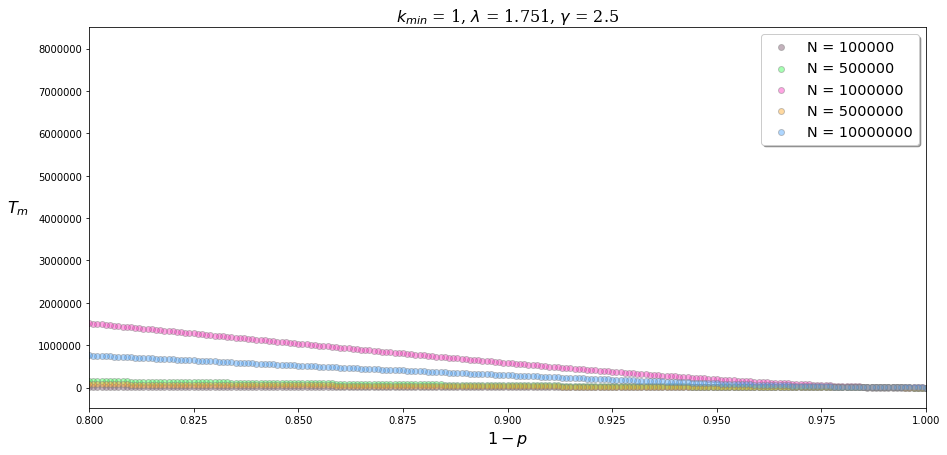

In [9]:
plot_Tm_p(0)
plt.savefig("/home/marcio/pCloudDrive/Physics/Thesis/Andre/Results/JPG/percolac_log_0_1.jpg", format='jpg', dpi=1200, bbox_inches = 'tight')

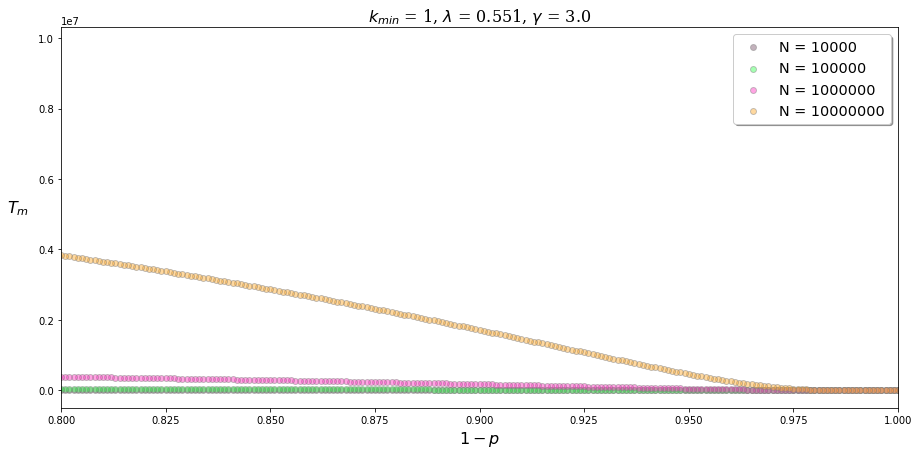

In [42]:
plot_Tm_p(1)
plt.savefig("/home/marcio/pCloudDrive/Physics/Thesis/Andre/Results/JPG/percolac_log_1_1.jpg", format='jpg', dpi=1200, bbox_inches = 'tight')

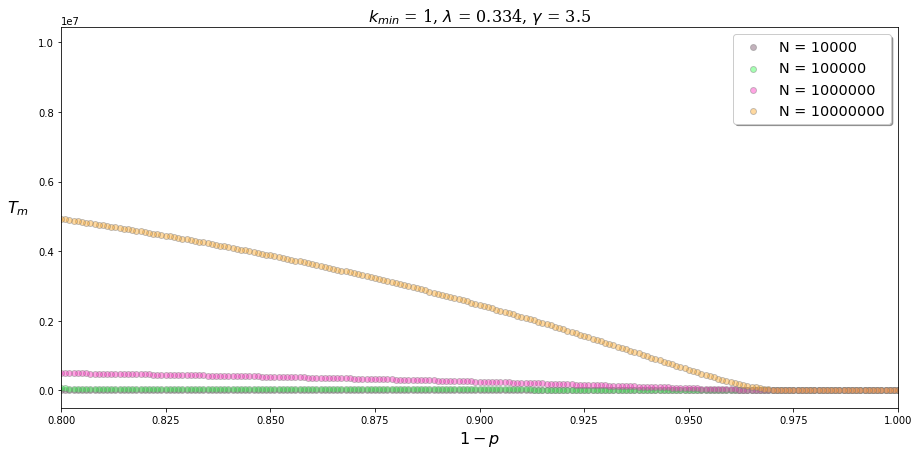

In [43]:
plot_Tm_p(2)
plt.savefig("/home/marcio/pCloudDrive/Physics/Thesis/Andre/Results/JPG/percolac_log_2_1.jpg", format='jpg', dpi=1200, bbox_inches = 'tight')

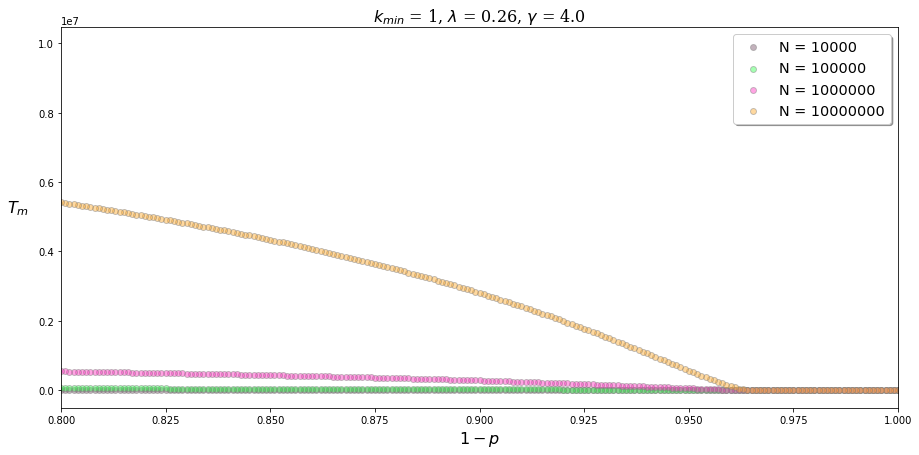

In [44]:
plot_Tm_p(3)
plt.savefig("/home/marcio/pCloudDrive/Physics/Thesis/Andre/Results/JPG/percolac_log_3_1.jpg", format='jpg', dpi=1200, bbox_inches = 'tight')

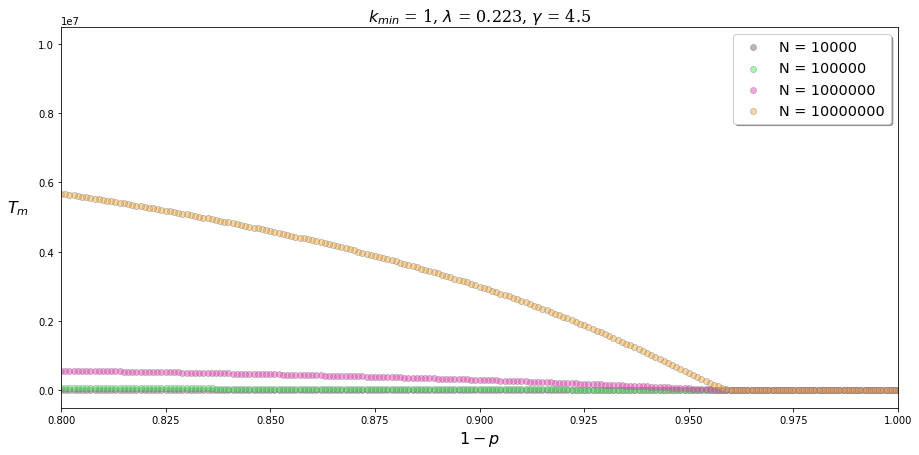

In [45]:
plot_Tm_p(4)
plt.savefig("/home/marcio/pCloudDrive/Physics/Thesis/Andre/Results/JPG/percolac_log_4_1.jpg", format='jpg', dpi=1200, bbox_inches = 'tight')

In [46]:
def plot_graph(data):
    fig, axs = plt.subplots(figsize=(15, 7))
    i = 0
    for datum in data:
        axs.plot(1 - datum[4].T[0][:-1], datum[4].T[1][:-1], color=c[i], label=titles[i], lw=1, alpha=0.8)
        for d in datum:
            axs.plot(1 - d.T[0][:-1], d.T[1][:-1], color=c[i], lw=1, alpha=0.8)
        i += 1
    plt.ylabel('$T_m$', rotation=0, labelpad=20, fontdict=font)
    plt.xlabel('$1 - p$', font)
    plt.xlim(0.7,1)
    plt.xscale('log')
#     plt.yscale('log')
    axs.legend(loc='lower left', shadow=True, fontsize='x-large')
    plt.title( 'Overlaped curves', fontdict=font)

In [19]:
def plot_Tm_p_all():
    fig = plt.figure(figsize=(15, 14))
    fig.tight_layout()
    for i in range(5):
        j = 0
        for d in data[i]:
            ax = fig.add_subplot(5, 1, i + 1)
            ax.scatter(1-d[:-1].T[0], d[:-1].T[1], color="gray", facecolors=c[4 - j], label=r'N = %.0f' %N[j], alpha=0.45)
            ax.legend(loc='lower left', shadow=True, fontsize='x-large')

            ax.set_xticks([])
            if(i == 2):
                ax.set_ylabel('$T_m$', rotation=0, labelpad=20, fontdict=font)
            plt.xlim(0.5,1)
            plt.subplots_adjust(hspace = .001)
            plt.xscale('log')
            j += 1
            plt.text(0.75, 0.8, titles[i], fontdict=font)
    plt.xlabel('$1 - p$', font)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:7: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  import sys


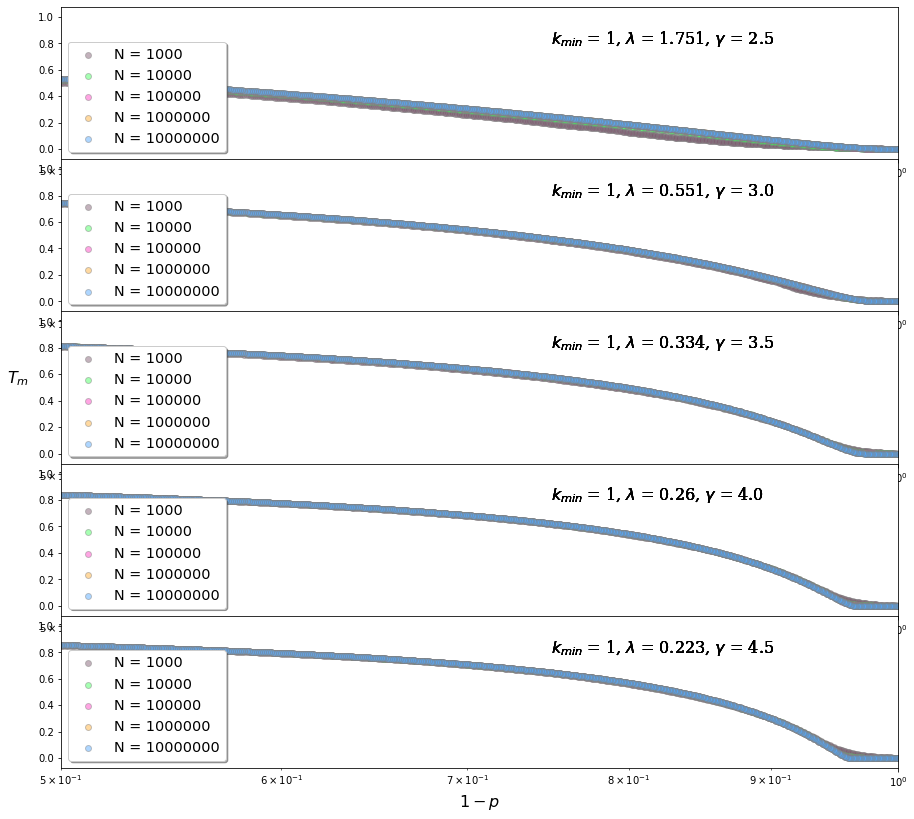

In [43]:
plot_Tm_p_all()
plt.savefig("/home/marcio/pCloudDrive/Physics/Thesis/Andre/Results/JPG/percolac_log_all.jpg", format='jpg', dpi=1200, bbox_inches = 'tight')

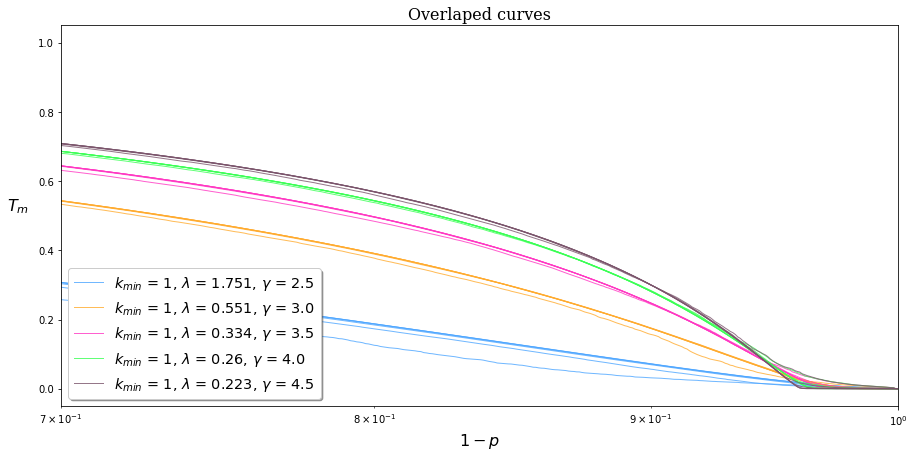

In [39]:
plot_graph(data)
plt.savefig("/home/marcio/pCloudDrive/Physics/Thesis/Andre/Results/JPG/percolac_log_all_overlap.jpg", format='jpg', dpi=1200, bbox_inches = 'tight')

### Critical points behavior (inflection of first derivative and appearence of giant component)

In [14]:
def dfdx3p(i, h, n, y):
    return (1 / (2 * h * n)) * (y[i + n] - y[i - n])

def dfdx5p(i, h , n, y):
    h = n * h
    return (1 / (12 * h)) * (y[i - (2 * n)] - 8 * y[i - (n)] + 8 * y[i + (n)] - y[i + (2 * n)])

def d1(h, y, i):
    return (1 / (2 * h)) * (y[i + 1] - y[i - 1])

def d2(h, y, i):
    return (1 / (h * h)) * (y[i - 1] - 2 * y[i] + y[i + 1])

In [15]:
from scipy.signal import savgol_filter

In [16]:
from statsmodels.nonparametric.smoothers_lowess import lowess

In [17]:
def plot_dTm_p_all():
    fig = plt.figure(figsize=(15, 14))
    fig.tight_layout()
    results = []
    for i in range(5):
        pc_per_N = []
        j = 0
        for d in data[i]:
            x = d.T[0][2:-1]
            y = d1(d.T[0][1], d.T[1][:-1], np.array(range(1, len(d.T[0][:-1]) - 1)))
            if(i <= 1):
                yhat = lowess(y, x, frac=1/10).T[1]
            else:
                yhat = savgol_filter(y, 51, 2) # window size 51, polynomial order 2
            
            #Get p in inflection point
            pc_per_N.append(x[np.argmax(yhat)])
            
            ax = fig.add_subplot(5, 1, i + 1)
            ax.plot(x, yhat, color=c[4 - j], label=r'N = %.0f' %N[j], alpha=0.7)
            ax.set_xticks([])
            if(i == 2):
                ax.set_ylabel(r'$\frac{dT_m}{dp}$', rotation=0, labelpad=20, fontdict=font1)
            plt.xlim(0,1)
            plt.subplots_adjust(hspace = .001)
#             plt.xscale('log')
            j += 1
            if(i == 0):
                plt.text(0.415, 0.6, titles[i], fontdict=font)
            else:
                plt.text(0.415, 2.5, titles[i], fontdict=font)
        results.append(pc_per_N)
    plt.legend(loc='upper right', shadow=False, fontsize='x-large', fancybox=True, framealpha=0.50)
    
    plt.xlabel('$p$', font1)
    plt.xticks([0, 0.25, 0.5, 0.75, 1])
    return results

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:19: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.


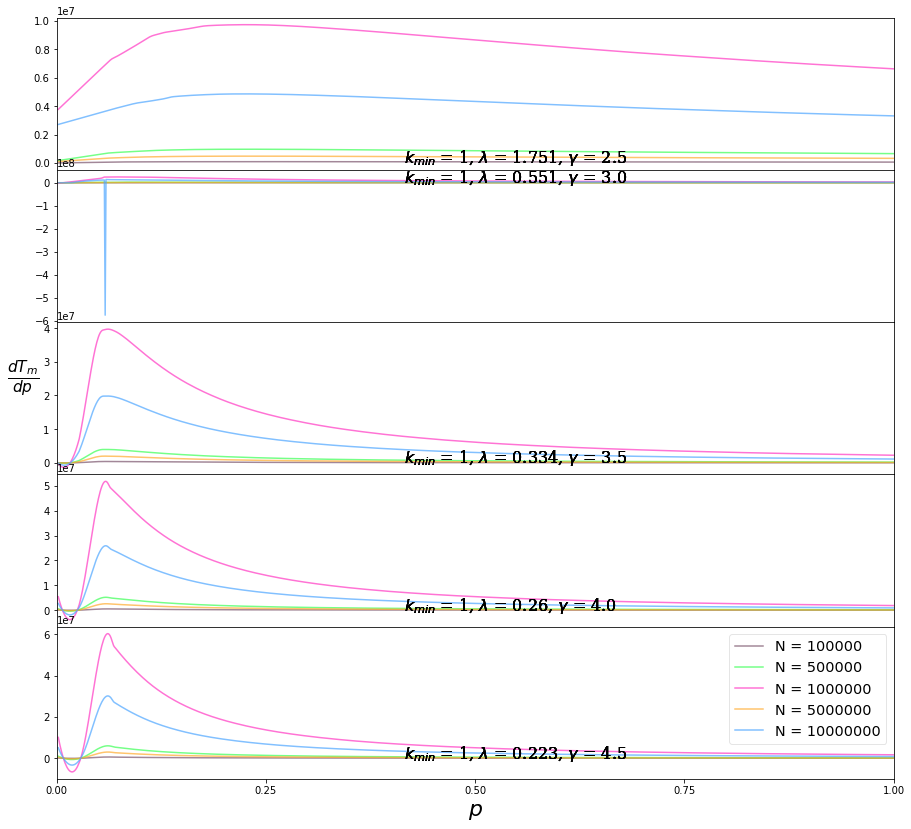

In [18]:
results = plot_dTm_p_all()
plt.savefig("/home/marcio/pCloudDrive/Physics/Thesis/Andre/Results/JPG/dTm_all_overlap.jpg", format='jpg', dpi=1200, bbox_inches = 'tight')

In [19]:
results

[[0.243, 0.228, 0.227, 0.228, 0.225],
 [0.054, 0.077, 0.069, 0.06, 0.059],
 [0.057, 0.056, 0.061, 0.057, 0.061],
 [0.06, 0.059, 0.059, 0.059, 0.059],
 [0.062, 0.061, 0.061, 0.061, 0.061]]

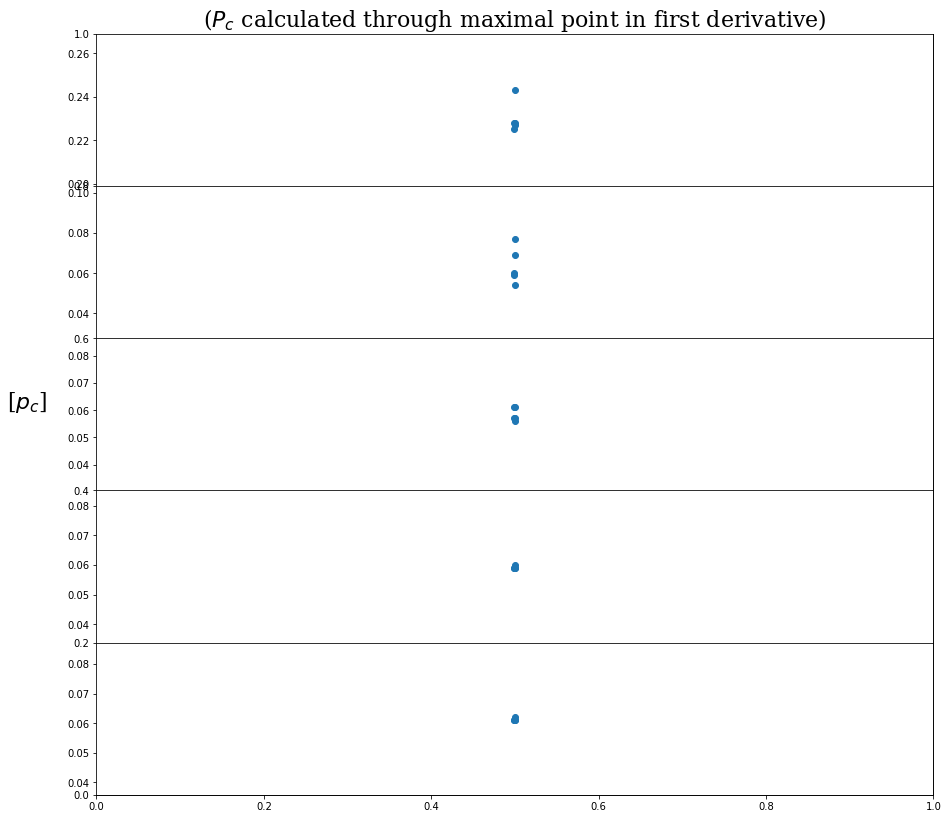

In [20]:
fig = plt.figure(figsize=(15, 14))
fig.tight_layout()
plt.title('($P_c$ calculated through maximal point in first derivative)', fontdict=font1)
for i in range(5):
    ax = fig.add_subplot(5, 1, i + 1)
    ax.scatter(1/N, results[i], alpha=1)
    ax.set_xticks([])
    if(i == 2):
        ax.set_ylabel(r'[$p_c$]', rotation=0, labelpad=40, fontdict=font1) 
# plt.xlim(0.4,0.6)

plt.subplots_adjust(hspace = .001)
#     plt.xscale('log')
#     plt.yscale('log')

In [21]:
def plot_pc_all(results):
    fig = plt.figure(figsize=(15, 14))
    fig.tight_layout()
    plt.title('($P_c$ calculated through maximal point in first derivative)', fontdict=font1)
    for i in range(5):
        ax = fig.add_subplot(5, 1, i + 1)
        ax.scatter(1/N, results[i], alpha=1)
        ax.set_xticks([])
        if(i == 2):
            ax.set_ylabel(r'[$p_c$]', rotation=0, labelpad=40, fontdict=font1) 
#         plt.xlim(0,0.2)
        plt.subplots_adjust(hspace = .001)
#         plt.xscale('log')
#         plt.yscale('log')
            
#     plt.legend(loc='upper right', shadow=False, fontsize='x-large', fancybox=True, framealpha=0.50)
    
    plt.xlabel(r'[$1/N$]', font1)

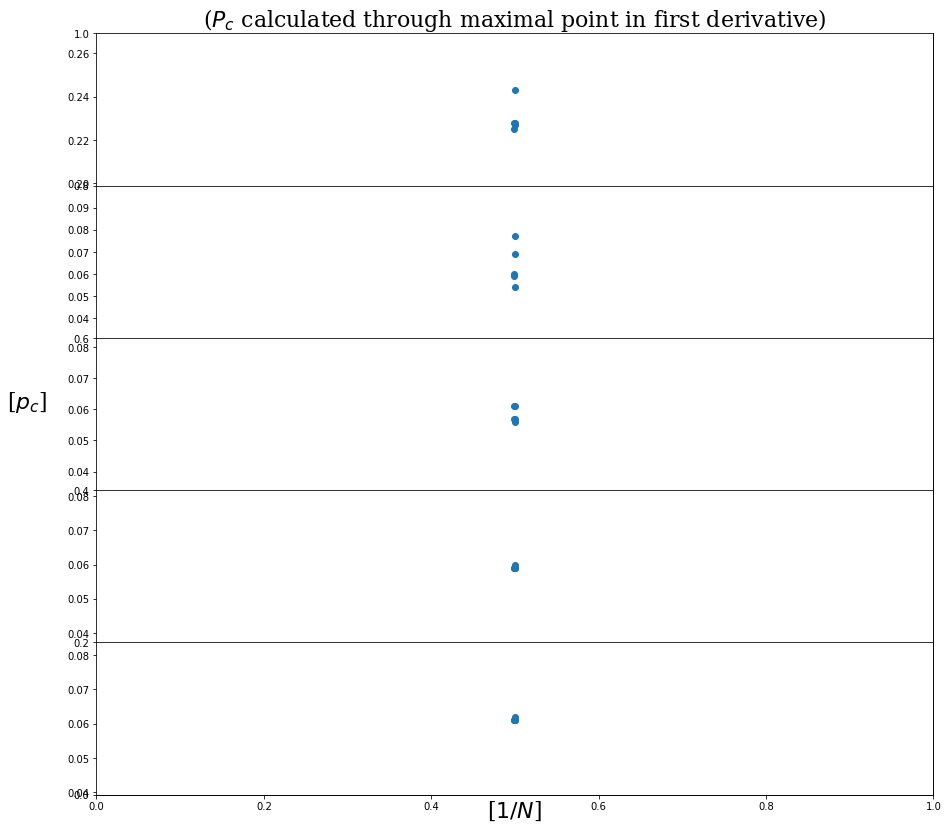

In [22]:
plot_pc_all(results)

In [23]:
data[0][1][0][2:-1]

array([], dtype=float64)

In [24]:
data[0][1][0]

array([0., 1., 0.])

In [27]:
def plot_pco_all():
    fig = plt.figure(figsize=(15, 14))
    fig.tight_layout()
    plt.title('($P_c$ calculated through threshold of Molloy-Reed criteria)', fontdict=font1)
    for i in range(5):
        pc = []
        for j in range(4):
            d = data[i][j]
            x = d.T[0][2:-1]
            y = d2(d.T[0][1], d.T[1][1:-1], np.array(range(1, len(d.T[0][1:-1]) - 1)))
            for k in range(len(y)):
                if (yhat[k] >=0 and yhat[k + 1] < 0):
                    pc.append((x[k] + x[k+1]) / 2)
                    break
            ax = fig.add_subplot(5, 1, i + 1)
            ax.set_xticks([])
            if(i == 2):
                ax.set_ylabel(r'[$p_c$]', rotation=0, labelpad=40, fontdict=font1)
            plt.subplots_adjust(hspace = .001)
            plt.xscale('log')
        plt.scatter(1/N, pc, alpha=0.7)
        plt.yscale('log')           
    plt.legend(loc='upper right', shadow=False, fontsize='x-large', fancybox=True, framealpha=0.50)
    plt.xlabel(r'[$1/N$]', font1)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:16: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  app.launch_new_instance()


ValueError: x and y must be the same size

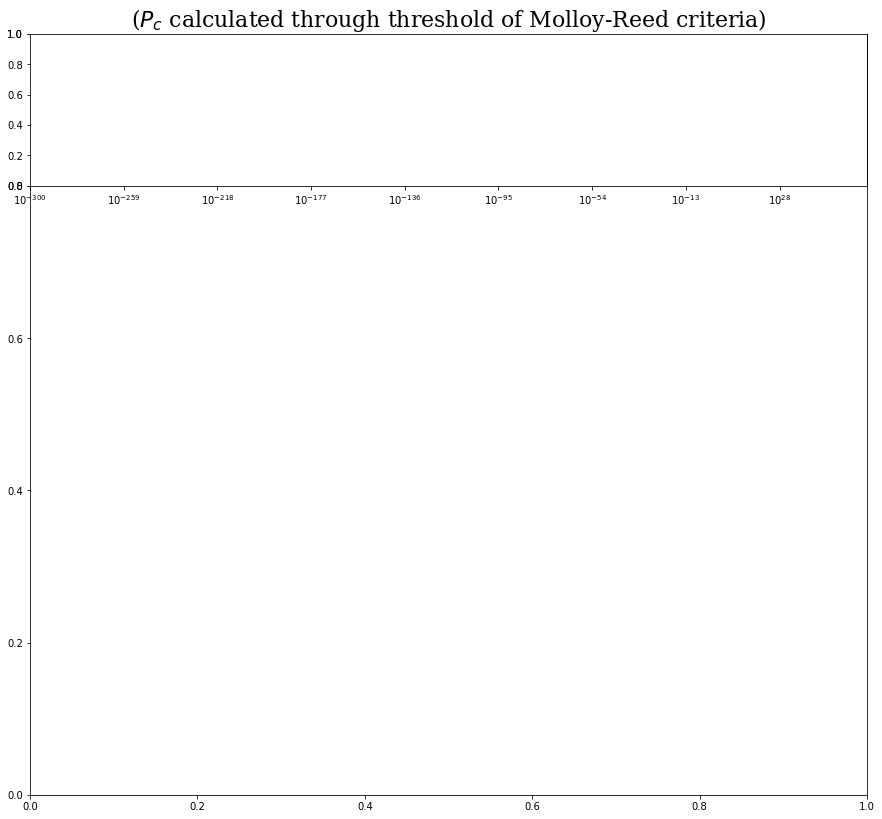

In [28]:
plot_pco_all()

# Kmin = 2

## Criticality analysis

### Read the simulation of biggest component size (series per fraction of edges added)

In [99]:
folder = "/home/marcio/pCloudDrive/Physics/Thesis/Andre/Results/Mean/"
data = []
for i in range(5):
    filenames = sorted(glob.glob(folder + 'Biggest_component_1E*_'+str(i)+'_2.txt'))
    print(filenames)
    data.append([np.loadtxt(fname=f, delimiter=',') for f in filenames])

['/home/marcio/pCloudDrive/Physics/Thesis/Andre/Results/Mean/Biggest_component_1E3_0_2.txt', '/home/marcio/pCloudDrive/Physics/Thesis/Andre/Results/Mean/Biggest_component_1E4_0_2.txt', '/home/marcio/pCloudDrive/Physics/Thesis/Andre/Results/Mean/Biggest_component_1E5_0_2.txt', '/home/marcio/pCloudDrive/Physics/Thesis/Andre/Results/Mean/Biggest_component_1E6_0_2.txt', '/home/marcio/pCloudDrive/Physics/Thesis/Andre/Results/Mean/Biggest_component_1E7_0_2.txt']
['/home/marcio/pCloudDrive/Physics/Thesis/Andre/Results/Mean/Biggest_component_1E3_1_2.txt', '/home/marcio/pCloudDrive/Physics/Thesis/Andre/Results/Mean/Biggest_component_1E4_1_2.txt', '/home/marcio/pCloudDrive/Physics/Thesis/Andre/Results/Mean/Biggest_component_1E5_1_2.txt', '/home/marcio/pCloudDrive/Physics/Thesis/Andre/Results/Mean/Biggest_component_1E6_1_2.txt', '/home/marcio/pCloudDrive/Physics/Thesis/Andre/Results/Mean/Biggest_component_1E7_1_2.txt']
['/home/marcio/pCloudDrive/Physics/Thesis/Andre/Results/Mean/Biggest_component

In [100]:
N = np.array([1e3, 1e4, 1e5, 1e6, 1e7])

In [101]:
c = ['#4DA6FF', '#FFAB2E', '#FF38C3', '#3BFF55', '#7b556c']

In [102]:
font = {'family': 'serif',
        'color':  'black',
        'weight': 'normal',
        'size': 16,
        }
font1 ={'family': 'serif',
        'color':  'black',
        'weight': 'normal',
        'size': '22',
        }
titles = [r'$k_{min}$ = 2, $\lambda$ = 1.751, $\gamma$ = 2.5', 
          r'$k_{min}$ = 2, $\lambda$ = 0.551, $\gamma$ = 3.0',
          r'$k_{min}$ = 2, $\lambda$ = 0.334, $\gamma$ = 3.5',
          r'$k_{min}$ = 2, $\lambda$ = 0.26, $\gamma$ = 4.0',
          r'$k_{min}$ = 2, $\lambda$ = 0.223, $\gamma$ = 4.5']

In [103]:
def plot_Tm_p(i):
    fig, axs = plt.subplots(figsize=(15, 7))
    j = 0
    for d in data[i]:
        axs.scatter(1-d[:-1].T[0], d[:-1].T[1], color="gray", facecolors=c[4 - j], label=r'N = %.0f' %N[j], alpha=0.45)
        axs.legend(loc='lower left', shadow=True, fontsize='x-large')
        plt.ylabel('$T_m$', rotation=0, labelpad=20, fontdict=font)
        plt.xlabel('$1 - p$', font)
        plt.xlim(0.1,1)
        plt.xscale('log')
        j += 1
        plt.title(titles[i], fontdict=font)

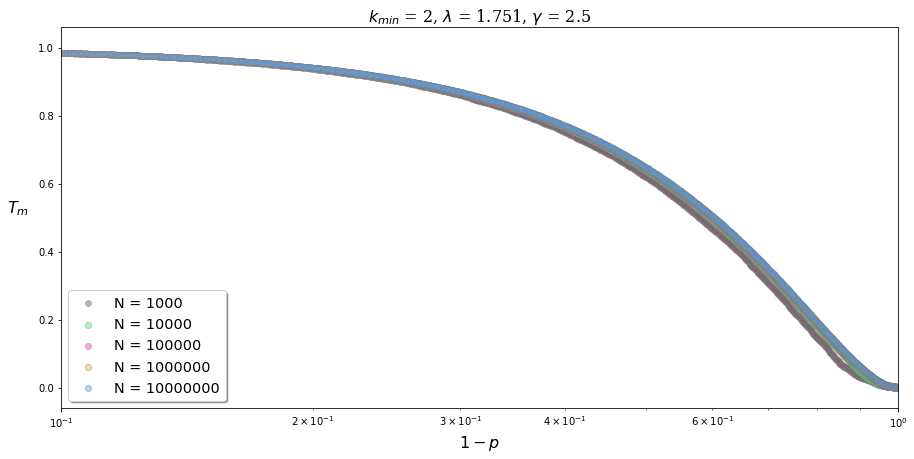

In [104]:
plot_Tm_p(0)
plt.savefig("/home/marcio/pCloudDrive/Physics/Thesis/Andre/Results/JPG/percolac_log_0_2.jpg", format='jpg', dpi=1200, bbox_inches = 'tight')

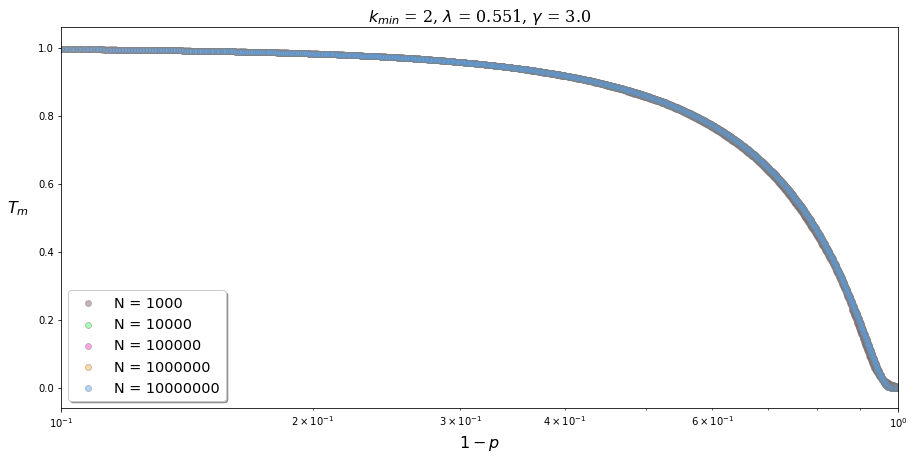

In [105]:
plot_Tm_p(1)
plt.savefig("/home/marcio/pCloudDrive/Physics/Thesis/Andre/Results/JPG/percolac_log_1_2.jpg", format='jpg', dpi=1200, bbox_inches = 'tight')

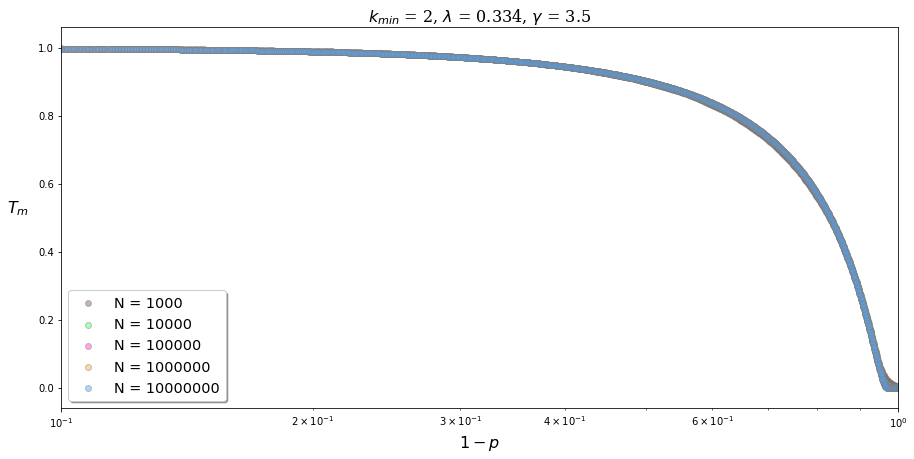

In [106]:
plot_Tm_p(2)
plt.savefig("/home/marcio/pCloudDrive/Physics/Thesis/Andre/Results/JPG/percolac_log_2_2.jpg", format='jpg', dpi=1200, bbox_inches = 'tight')

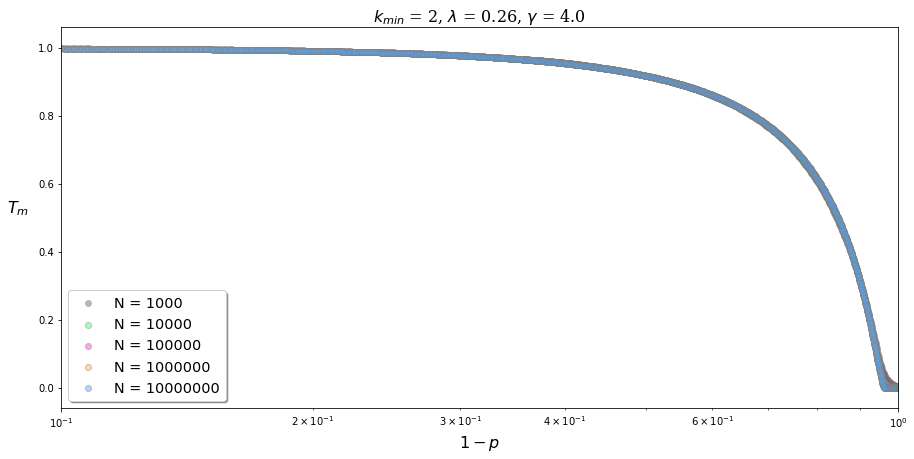

In [107]:
plot_Tm_p(3)
plt.savefig("/home/marcio/pCloudDrive/Physics/Thesis/Andre/Results/JPG/percolac_log_3_2.jpg", format='jpg', dpi=1200, bbox_inches = 'tight')

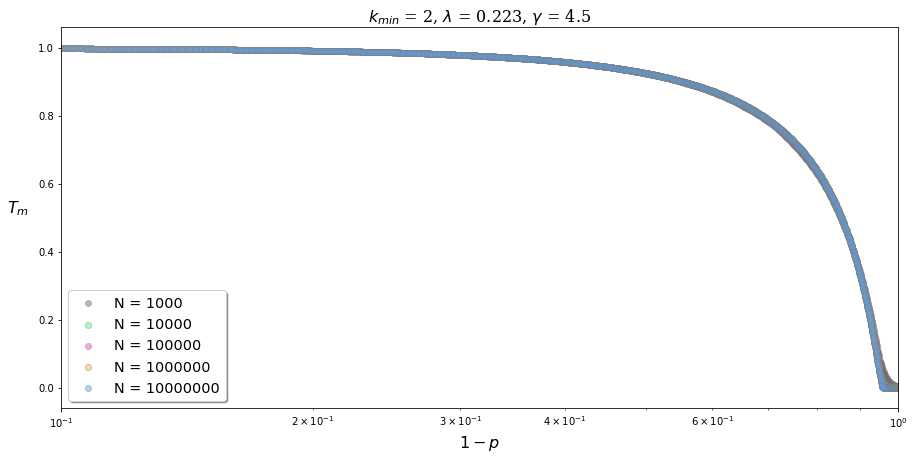

In [108]:
plot_Tm_p(4)
plt.savefig("/home/marcio/pCloudDrive/Physics/Thesis/Andre/Results/JPG/percolac_log_4_2.jpg", format='jpg', dpi=1200, bbox_inches = 'tight')

In [109]:
def plot_graph(data):
    fig, axs = plt.subplots(figsize=(15, 7))
    i = 0
    for datum in data:
        axs.plot(1 - datum[4].T[0][:-1], datum[4].T[1][:-1], color=c[i], label=titles[i], lw=1, alpha=0.8)
        for d in datum:
            axs.plot(1 - d.T[0][:-1], d.T[1][:-1], color=c[i], lw=1, alpha=0.8)
        i += 1
    plt.ylabel('$T_m$', rotation=0, labelpad=20, fontdict=font)
    plt.xlabel('$1 - p$', font)
    plt.xlim(0.1,1)
    plt.xscale('log')
#     plt.yscale('log')
    axs.legend(loc='lower left', shadow=True, fontsize='x-large')
    plt.title( 'Overlaped curves', fontdict=font)

In [110]:
def plot_Tm_p_all():
    fig = plt.figure(figsize=(15, 14))
    fig.tight_layout()
    for i in range(5):
        j = 0
        for d in data[i]:
            ax = fig.add_subplot(5, 1, i + 1)
            ax.scatter(1-d[:-1].T[0], d[:-1].T[1], color="gray", facecolors=c[4 - j], label=r'N = %.0f' %N[j], alpha=0.45)
            ax.legend(loc='lower left', shadow=True, fontsize='x-large')

            ax.set_xticks([])
            if(i == 2):
                ax.set_ylabel('$T_m$', rotation=0, labelpad=20, fontdict=font)
            plt.xlim(0.07,1)
            plt.subplots_adjust(hspace = .001)
            plt.xscale('log')
            j += 1
            plt.text(0.25, 0.0, titles[i], fontdict=font)
    plt.xlabel('$1 - p$', font)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:7: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  import sys


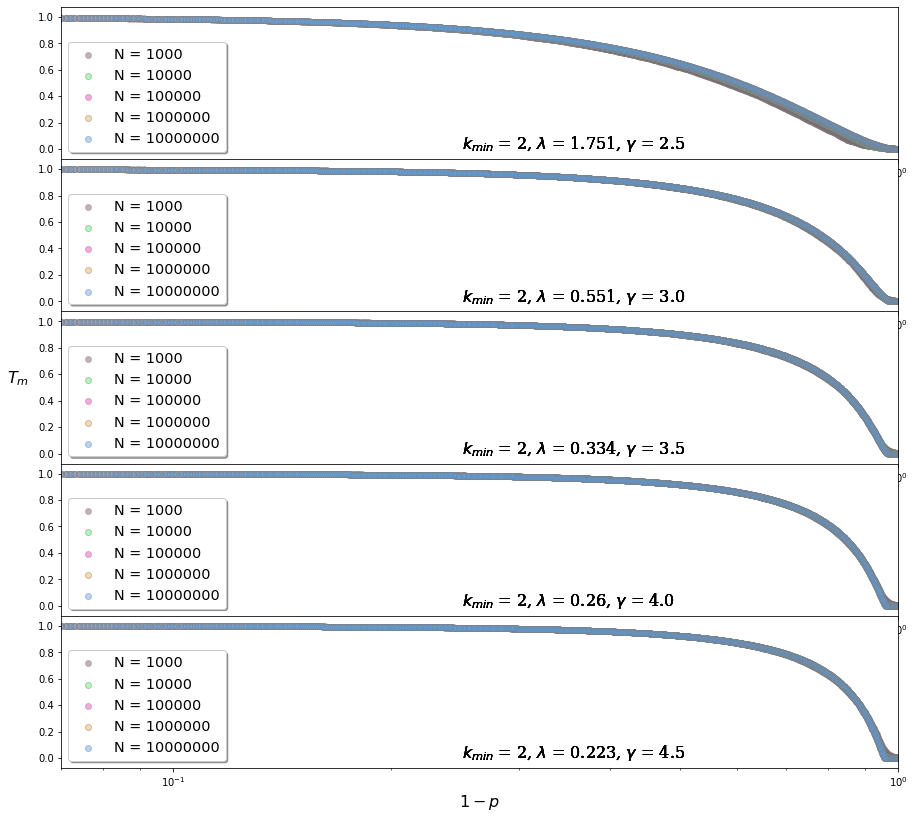

In [111]:
plot_Tm_p_all()
plt.savefig("/home/marcio/pCloudDrive/Physics/Thesis/Andre/Results/JPG/percolac_log_all_2.jpg", format='jpg', dpi=1200, bbox_inches = 'tight')

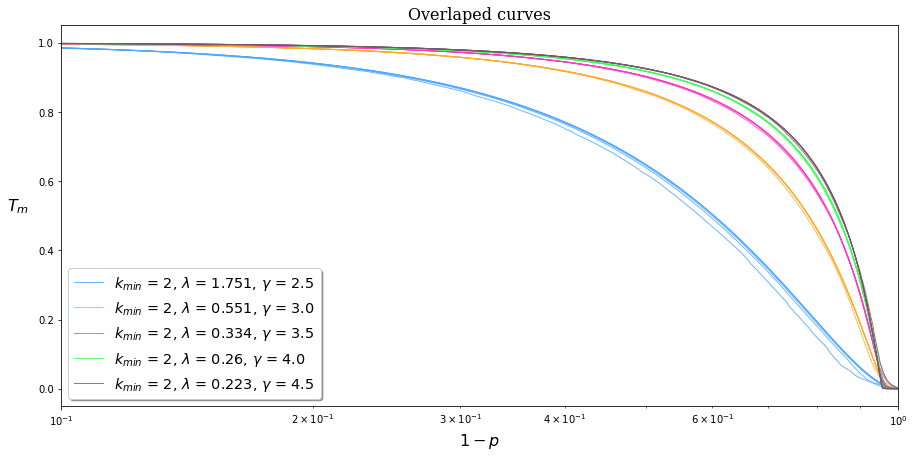

In [112]:
plot_graph(data)
plt.savefig("/home/marcio/pCloudDrive/Physics/Thesis/Andre/Results/JPG/percolac_log_all_overlap_2.jpg", format='jpg', dpi=1200, bbox_inches = 'tight')

### Critical points behavior (inflection of first derivative and appearence of giant component)

In [126]:
def plot_dTm_p_all():
    fig = plt.figure(figsize=(15, 14))
    fig.tight_layout()
    results = []
    for i in range(5):
        pc_per_N = []
        j = 0
        for d in data[i]:
            x = d.T[0][2:-1]
            y = d1(d.T[0][1], d.T[1][:-1], np.array(range(1, len(d.T[0][:-1]) - 1)))
            if(i <= 0):
                yhat = lowess(y, x, frac=1/10).T[1]
            else:
                yhat = savgol_filter(y, 51, 2) # window size 51, polynomial order 2
            
            #Get p in inflection point
            pc_per_N.append(x[np.argmax(y)])
            
            ax = fig.add_subplot(5, 1, i + 1)
            ax.plot(x, yhat, color=c[4 - j], label=r'N = %.0f' %N[j], alpha=0.7)
            ax.set_xticks([])
            if(i == 2):
                ax.set_ylabel(r'$\frac{dT_m}{dp}$', rotation=0, labelpad=20, fontdict=font1)
            plt.xlim(0,1)
            plt.subplots_adjust(hspace = .001)
#             plt.xscale('log')
            j += 1
            if(i == 0):
                plt.text(0.415, 0.6, titles[i], fontdict=font)
            else:
                plt.text(0.415, 2.5, titles[i], fontdict=font)
        results.append(pc_per_N)
    plt.legend(loc='upper right', shadow=False, fontsize='x-large', fancybox=True, framealpha=0.50)
    
    plt.xlabel('$p$', font1)
    plt.xticks([0, 0.25, 0.5, 0.75, 1])
    return results

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:19: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.


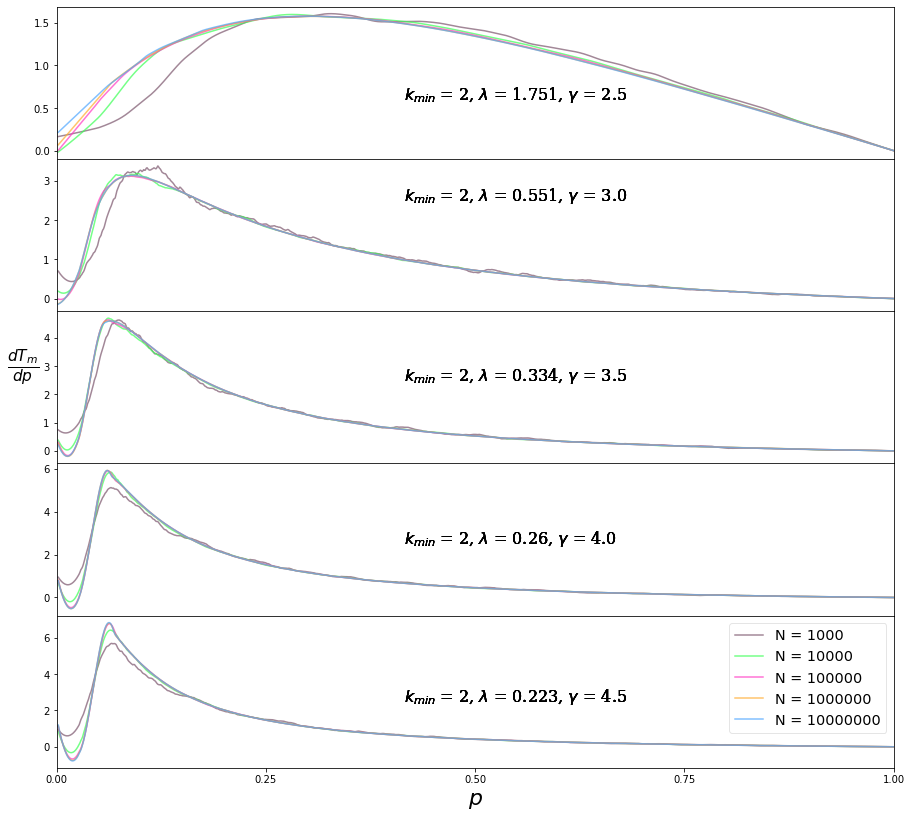

In [127]:
results = plot_dTm_p_all()
plt.savefig("/home/marcio/pCloudDrive/Physics/Thesis/Andre/Results/JPG/dTm_all_overlap_2.jpg", format='jpg', dpi=1200, bbox_inches = 'tight')

In [128]:
def plot_pc_all(results):
    fig = plt.figure(figsize=(15, 14))
    fig.tight_layout()
    plt.title('($P_c$ calculated through maximal point in first derivative)', fontdict=font1)
    for i in range(5):
        ax = fig.add_subplot(5, 1, i + 1)
        ax.plot(1/N, results[i], alpha=1)
        ax.set_xticks([])
        if(i == 2):
            ax.set_ylabel(r'[$p_c$]', rotation=0, labelpad=40, fontdict=font1) 
#         plt.xlim(0,0.2)
        plt.subplots_adjust(hspace = .001)
        plt.xscale('log')
        plt.yscale('log')
            
#     plt.legend(loc='upper right', shadow=False, fontsize='x-large', fancybox=True, framealpha=0.50)
    
    plt.xlabel(r'[$1/N$]', font1)

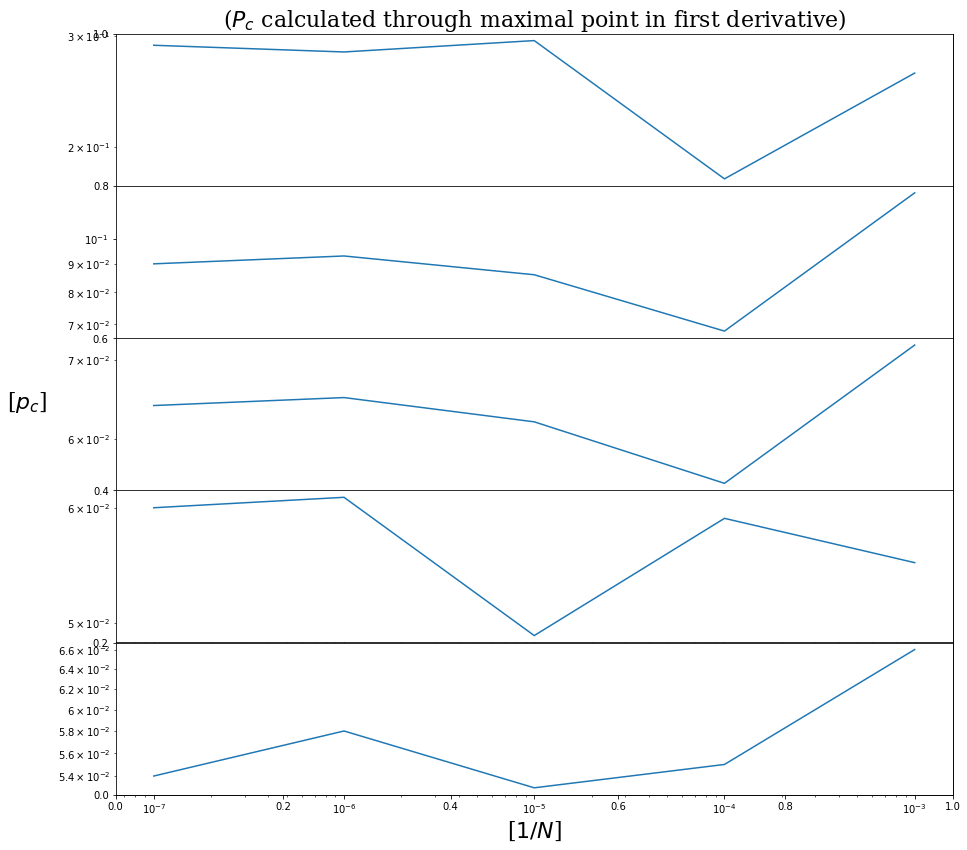

In [129]:
plot_pc_all(results)

In [130]:
def plot_pco_all():
    fig = plt.figure(figsize=(15, 14))
    fig.tight_layout()
    plt.title('($P_c$ calculated through threshold of giant component appearence)', fontdict=font1)
    for i in range(5):
        pc = []
        for j in range(5):
            d = data[i][j]
            x = d.T[0][2:-1]
            y = d2(d.T[0][1], d.T[1][:-1], np.array(range(1, len(d.T[0][:-1]) - 1)))
            yhat = savgol_filter(y, 115, 1)
            for k in range(len(y)):
                if (yhat[k] >=0 and yhat[k + 1] < 0):
                    pc.append((x[k] + x[k+1]) / 2)
                    break
            ax = fig.add_subplot(5, 1, i + 1)
            ax.set_xticks([])
            if(i == 2):
                ax.set_ylabel(r'[$p_c$]', rotation=0, labelpad=40, fontdict=font1)
            plt.subplots_adjust(hspace = .001)
            plt.xscale('log')
        plt.plot(1/N, pc, alpha=0.7)
        plt.yscale('log')           
    plt.legend(loc='upper right', shadow=False, fontsize='x-large', fancybox=True, framealpha=0.50)
    plt.xlabel(r'[$1/N$]', font1)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:16: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  app.launch_new_instance()
No handles with labels found to put in legend.


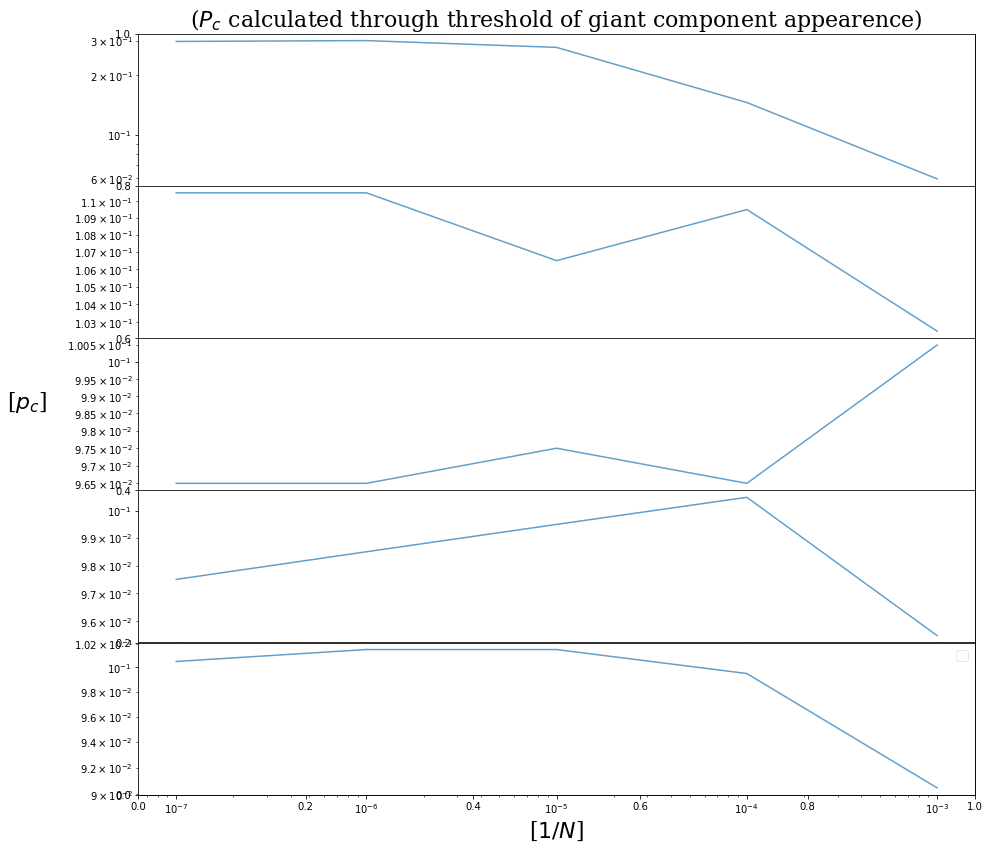

In [132]:
plot_pco_all()